## Pricing data analysis - Van Westendorp

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import holoviews as hv
import hvplot.pandas

In [2]:
df = pd.read_excel('pricing.xlsx')
df.head(5)

,Do you in general prefer online shopping or in-person shopping?,"Between hand made shoes and mass-produced shoes, which type do you prefer?","On average, how often do you buy football shoes?(1= every year, 10= every 10 years)",Do you believe that shoes produced in Italy are better quality than shoes made abroad?,Would you ever purchase football cleats without trying them on first?,Please describe your current occupation status,Please state the region you predominantly reside in,Have you lived in this region most of your life?,"If you answered ""no"" to the previous question, select your region of origin",Please state your age,Too Cheap,Cheap,Expensive,Too Expensive,How much did you pay the last pair of shoes you purchased?,How do you assess your financial possibilities?
0,Online,No preference,2,No,"No, never",Unemployed,Lombardia,Yes,NaN,24,40,80,100,120,50-80€,Low
1,In-person,Mass-produced,2,No,"No, never",Student & part-time/full-time worker,Lombardia,Yes,NaN,23,20,60,90,150,50-80€,Medium
2,Do an online search and then go to a physical ...,No preference,5,No,"No, never",Full-time worker,Lombardia,Yes,NaN,27,45,75,120,150,50-80€,Medium
3,In-person,Mass-produced,2,No,"Yes, but only if I have already purchased the ...",Full-time worker,Lombardia,Yes,NaN,24,20,50,100,150,50-80€,Medium
4,Online,Mass-produced,1,No,"No, never",Student & part-time/full-time worker,Lombardia,Yes,NaN,23,40,85,110,200,80-120€,Do not want to respond


In [3]:
df.rename(columns={
    'Do you in general prefer online shopping or in-person shopping?': 'Shopping',
    'Between hand made shoes and mass-produced shoes, which type do you prefer?': 'Shoe Type',
    'On average, how often do you buy football shoes?(1= every year, 10= every 10 years)': 'Football Purchase Frequency',
    'Do you believe that shoes produced in Italy are better quality than shoes made abroad?': 'Italian Shoes Quality',
    'Would you ever purchase football cleats without trying them on first?': 'Try Football Cleats',
    'Please describe your current occupation status': 'Occupation',
    'Please state the region you predominantly reside in': 'Region',
    'Have you lived in this region most of your life?': 'Lived in Region Most',
    'If you answered "no" to the previous question, select your region of origin': 'Region of Origin',
    'Please state your age': 'Age',
    'How much did you pay for the last pair of shoes you purchased?': 'Last Shoes Price',
    'How do you assess your financial possibilities?': 'Financial Assessment'
}, inplace=True)


In [4]:
df.head(3)

,Shopping,Shoe Type,Football Purchase Frequency,Italian Shoes Quality,Try Football Cleats,Occupation,Region,Lived in Region Most,Region of Origin,Age,Too Cheap,Cheap,Expensive,Too Expensive,How much did you pay the last pair of shoes you purchased?,Financial Assessment
0,Online,No preference,2,No,"No, never",Unemployed,Lombardia,Yes,NaN,24,40,80,100,120,50-80€,Low
1,In-person,Mass-produced,2,No,"No, never",Student & part-time/full-time worker,Lombardia,Yes,NaN,23,20,60,90,150,50-80€,Medium
2,Do an online search and then go to a physical ...,No preference,5,No,"No, never",Full-time worker,Lombardia,Yes,NaN,27,45,75,120,150,50-80€,Medium


In [5]:
df.rename(columns={'How much did you pay the last pair of shoes you purchased?': 'typical price bracket'}, inplace=True)

In [6]:
df.describe()

,Football Purchase Frequency,Age,Too Cheap,Cheap,Expensive,Too Expensive
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3.750000,27.750000,34.166667,73.125000,114.750000,151.625000
std,3.541677,6.137908,13.077251,20.259861,32.872944,44.339415
min,1.000000,21.000000,20.000000,35.000000,55.000000,60.000000
25%,1.000000,23.000000,20.000000,60.000000,90.000000,120.000000
50%,2.000000,25.000000,30.000000,75.000000,110.000000,150.000000
75%,5.000000,30.000000,46.250000,88.750000,140.000000,200.000000
max,10.000000,41.000000,60.000000,100.000000,200.000000,250.000000


## Sample info - respondent's profile

Overall, an average respondent is a (born and raised) Northern Italian in their late 20s, a full-time worker, and has medium financial capabilities.

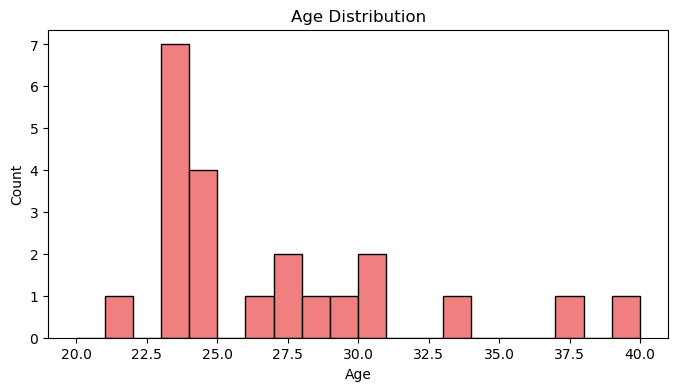

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=range(20, 41), color='lightcoral', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
counts = df['Occupation'].value_counts()
print("Respondents' occupation:")
for price, count in counts.items():
    print(f"{price}: {count}")

Respondents' occupation:
Full-time worker: 15
Student & part-time/full-time worker: 5
Full-time student: 3
Unemployed: 1


In [9]:
counts = df['Region'].value_counts()
print("Respondents' region of residence:")
for x, count in counts.items():
    print(f"{x}: {count}")

Respondents' region of residence:
Lombardia: 22
Lazio: 1
Piemonte: 1


In [10]:
counts = df['Region of Origin'].value_counts()
print("Some respondents' region of origin (if different from residence):")
for y, count in counts.items():
    print(f"{y}: {count}")

Some respondents' region of origin (if different from residence):
Calabria: 2
Marche: 1
Lombardia: 1
Campania: 1


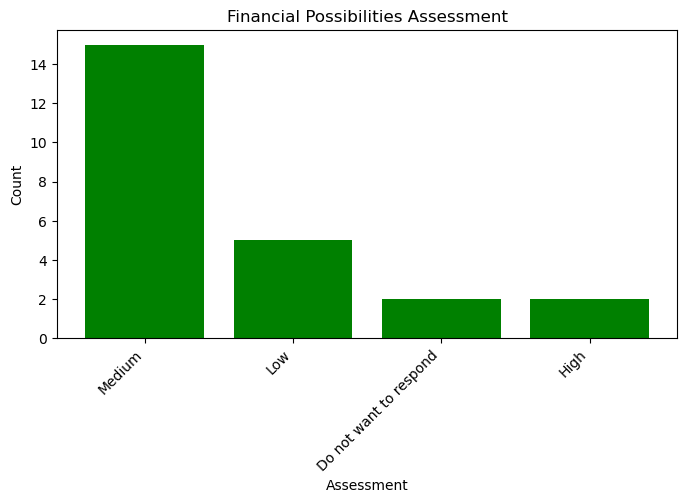

In [11]:
financial_counts = df['Financial Assessment'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(financial_counts.index, financial_counts, color='green')
plt.title('Financial Possibilities Assessment')
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Shopping habits & beliefs

An average respondent typically pays between 50 and 120 EUR for a pair of cleats which they buy every 3ish years. They prefer to shop in person and would never buy a pair of cleats from an unknown brand without trying them in real life. They do not particularly care for hand-made quality but some of them tend to believe that Italian-made shoes are better than the ones produced abroad.

In [12]:
price_counts = df['typical price bracket'].value_counts()
print("Typical price of shoes purchased by respondents:")
for price, count in price_counts.items():
    print(f"{price}: {count}")

Typical price of shoes purchased by respondents:
50-80€: 11
80-120€: 9
Less than 50€: 2
120-150€: 2


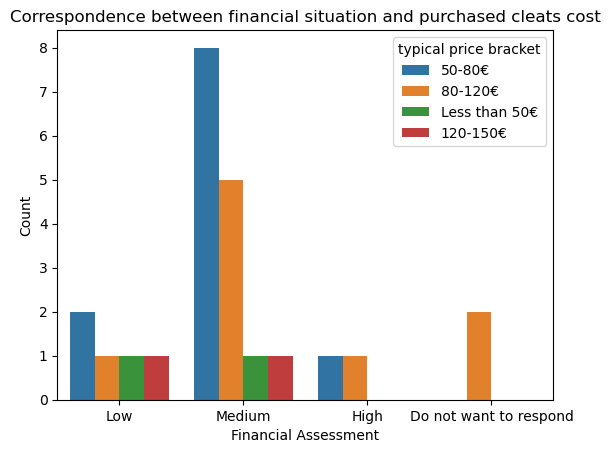

In [38]:
import seaborn as sns
order_of_bars = ["Low", "Medium", "High",'Do not want to respond']
sns.countplot(x='Financial Assessment', hue='typical price bracket', data=df, order=order_of_bars)
plt.title('Correspondence between financial situation and purchased cleats cost')
plt.xlabel('Financial Assessment')
plt.ylabel('Count')
plt.show()

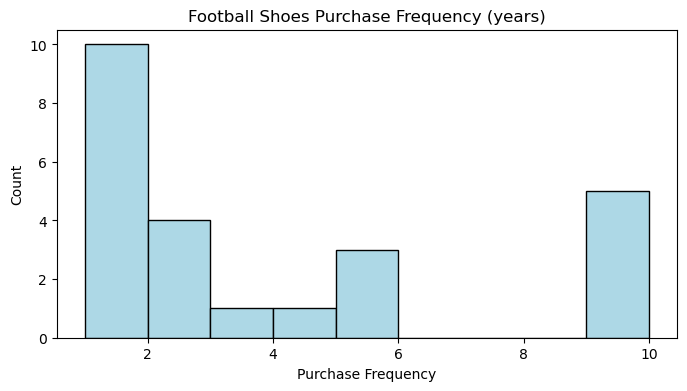

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(df['Football Purchase Frequency'], bins=range(1, 11), color='lightblue', edgecolor='black')
plt.title('Football Shoes Purchase Frequency (years)')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()

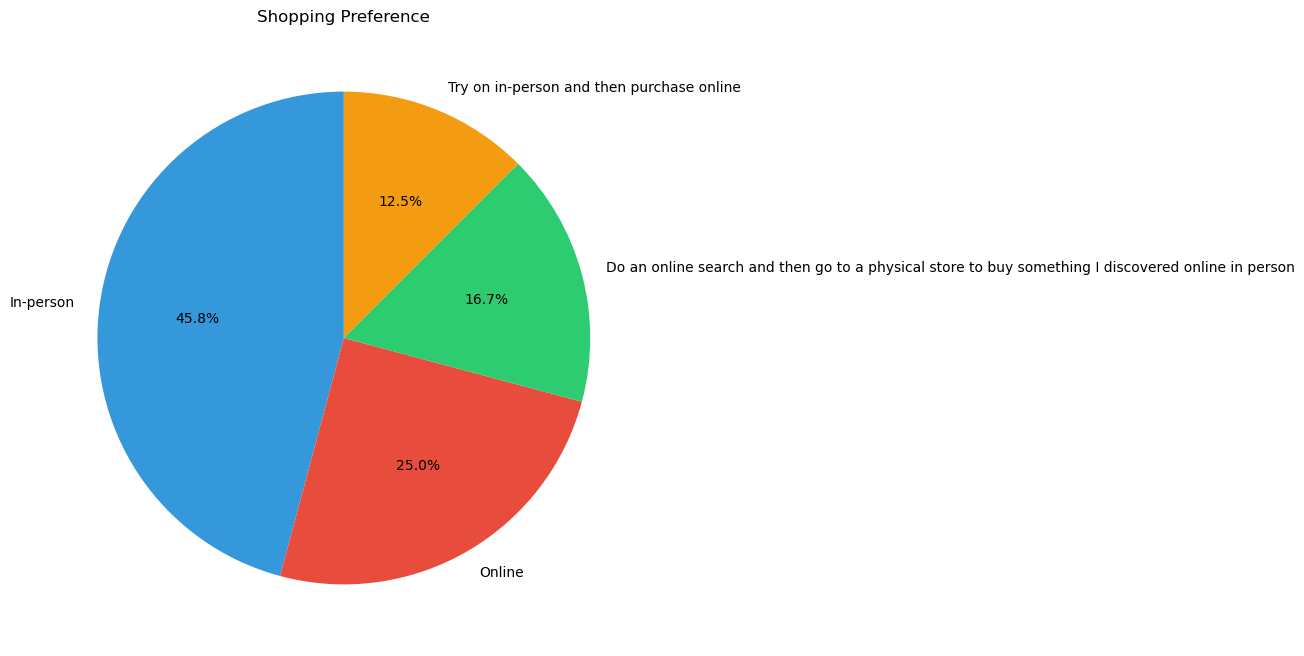

In [14]:
shopping_preference_counts = df['Shopping'].value_counts()
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
plt.figure(figsize=(8, 8))
plt.pie(shopping_preference_counts, labels=shopping_preference_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Shopping Preference')
plt.show()

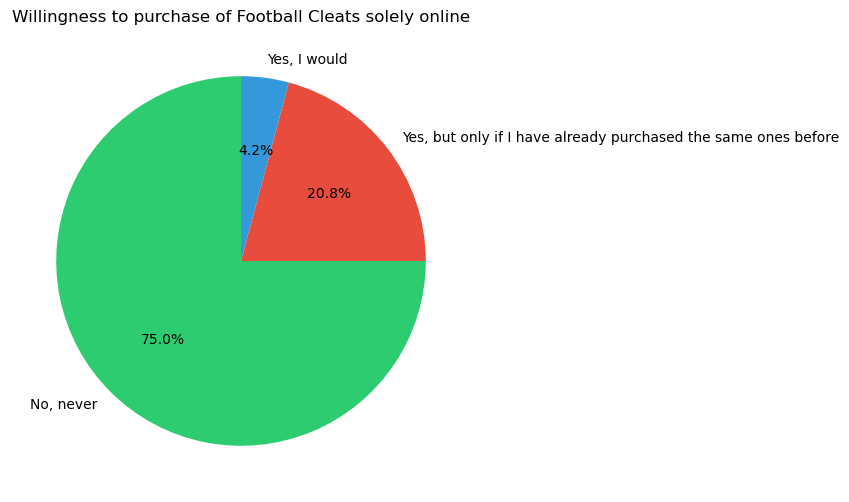

In [40]:
try_on_counts = df['Try Football Cleats'].value_counts()
custom_colors = ['#2ecc71', '#e74c3c','#3498db']
plt.figure(figsize=(6, 6))
plt.pie(try_on_counts, labels=try_on_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Willingness to purchase of Football Cleats solely online')
plt.show()

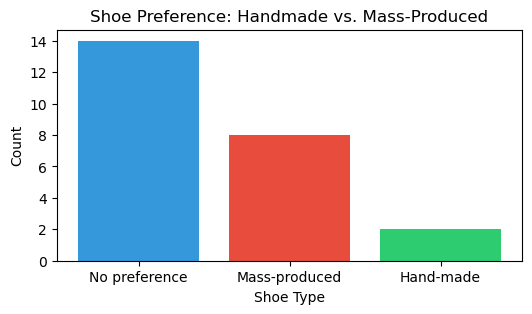

In [16]:
shoe_preference_counts = df['Shoe Type'].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(shoe_preference_counts.index, shoe_preference_counts, color=['#3498db', '#e74c3c','#2ecc71'])
plt.title('Shoe Preference: Handmade vs. Mass-Produced')
plt.xlabel('Shoe Type')
plt.ylabel('Count')
plt.show()

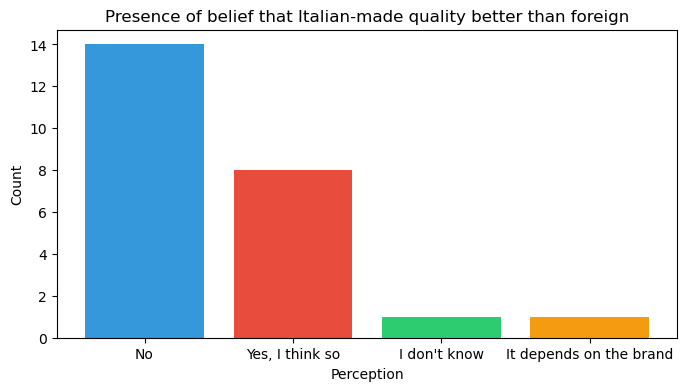

In [41]:
italian_quality_counts = df['Italian Shoes Quality'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(italian_quality_counts.index, italian_quality_counts, color=['#3498db', '#e74c3c','#2ecc71','#f39c12'])
plt.title('Presence of belief that Italian-made quality better than foreign')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()

## Van Westendorp


In [19]:
cols = ['Too Cheap','Cheap','Expensive','Too Expensive']
price = df[cols]
price.head()

,Too Cheap,Cheap,Expensive,Too Expensive
0,40,80,100,120
1,20,60,90,150
2,45,75,120,150
3,20,50,100,150
4,40,85,110,200


In [20]:
def price_sensitivity_meter(df, interpolate=False):
    # convert data from wide to long and calculate frequency of each price for each group
    df1 = (df[['Too Cheap', 'Cheap', 'Expensive', 'Too Expensive']]
             .unstack()
             .reset_index()
             .rename(columns = {'level_0':'label', 0: 'prices'})[['label','prices']]
             .groupby(['label','prices'])
             .size()
             .reset_index()
             .rename(columns = {0: 'frequency'})
            )
    # cumsum percentages
    df1['cumsum'] = df1.groupby(['label'])['frequency'].cumsum()
    df1['sum'] = df1.groupby(['label'])['frequency'].transform('sum')
    df1['percentage'] = 100*df1['cumsum']/df1['sum']
    # convert data from long back to wide
    df2 = df1.pivot_table('percentage', 'prices', 'label')

    if interpolate:
        df3 = df2.interpolate().fillna(0)
        df3['Too Cheap'] = 100 - df3['Too Cheap']
        df3['Cheap'] = 100 - df3['Cheap']
        plot = df3.hvplot(x='prices', 
                          y=['Too Cheap', 'Cheap', 'Expensive', 'Too Expensive'],
                          ylabel = 'Percentage',
                          height=400,
                          color=['green','lightgreen','lightpink','crimson']
                              ).opts(legend_position='bottom')
    
    else: 
        df3 = df2.ffill().fillna(0)
        
        df3['Too Cheap'] = 100 - df3['Too Cheap']
        df3['Cheap'] = 100 - df3['Cheap']
        plot = df3.hvplot.step(x='prices', 
                               y=['Too Cheap', 'Cheap', 'Expensive', 'Too Expensive'],
                               where='post',
                               ylabel = 'Percentage',
                               height=400,
                               color=['green','lightgreen','lightpink','crimson']
                              ).opts(legend_position='bottom')
    df3['optimal_diff'] = (df3['Too Cheap'] - df3['Too Expensive'])
    df3['left_diff'] = (df3['Too Cheap'] - df3['Expensive'])
    df3['right_diff'] = (df3['Too Expensive'] - df3['Cheap'])
    optimal = df3[df3['optimal_diff']<=0].index[0]
    lower_bound = df3[df3['left_diff']<=0].index[0]
    upper_bound = df3[df3['right_diff']>=0].index[0]
    

    optimal_line = hv.VLine(optimal).opts(color='blue', line_dash='dashed', line_width=0.4)

    lower_line = hv.VLine(lower_bound).opts(color='grey', line_dash='dashed', line_width=0.4)
    upper_line = hv.VLine(upper_bound).opts(color='grey', line_dash='dashed', line_width=0.4)

    
    print(f'Optimal Price: EUR {optimal}')
    print(f'Acceptable Price Range: EUR {lower_bound} to EUR {upper_bound}')
    
    return plot * lower_line * optimal_line * upper_line

In [21]:
price_sensitivity_meter(price, interpolate=False)

Optimal Price: EUR 60
Acceptable Price Range: EUR 60 to EUR 100


:Overlay
   .NdOverlay.I :NdOverlay   [label]
      :Curve   [prices]   (value)
   .VLine.I     :VLine   [x,y]
   .VLine.II    :VLine   [x,y]
   .VLine.III   :VLine   [x,y]